<a href="https://colab.research.google.com/github/Deepakj98-98/Logistic-Regression-with-regularization/blob/main/Logistic_regression_with_regularisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:

import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
# For example:
# imputer = SimpleImputer(strategy='mean')
# X = imputer.fit_transform(X)
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression



In [22]:
df=pd.read_csv('/content/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [23]:
x=df.iloc[:,2:11]
y=df.iloc[:,1]

In [24]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809


In [25]:
y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [26]:
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)

In [27]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [28]:
imputer=SimpleImputer(strategy='mean')
x_imputed=imputer.fit_transform(x)

In [29]:
x_imputed

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 3.001e-01, 1.471e-01,
        2.419e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 8.690e-02, 7.017e-02,
        1.812e-01],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 1.974e-01, 1.279e-01,
        2.069e-01],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 9.251e-02, 5.302e-02,
        1.590e-01],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 3.514e-01, 1.520e-01,
        2.397e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 0.000e+00,
        1.587e-01]])

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x_imputed,y,test_size=0.3,random_state=42)

In [31]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [33]:
pca=PCA(n_components=2)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [35]:
lr=LogisticRegression(solver="saga", max_iter=20, penalty="l2", C=0.01)
lr.fit(x_train_pca,y_train)

LogisticRegression(C=0.01, max_iter=20, solver='saga')

In [36]:
prediction, probability = lr.predict(x_test_pca), lr.predict_proba(x_test_pca)

In [37]:
prediction

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [38]:
probability

array([[0.75437524, 0.24562476],
       [0.26570865, 0.73429135],
       [0.37106021, 0.62893979],
       [0.75927215, 0.24072785],
       [0.84445236, 0.15554764],
       [0.00808943, 0.99191057],
       [0.02135455, 0.97864545],
       [0.36497184, 0.63502816],
       [0.5737592 , 0.4262408 ],
       [0.86281486, 0.13718514],
       [0.82878826, 0.17121174],
       [0.46073816, 0.53926184],
       [0.80340494, 0.19659506],
       [0.26470301, 0.73529699],
       [0.88906028, 0.11093972],
       [0.05437583, 0.94562417],
       [0.81058178, 0.18941822],
       [0.91879566, 0.08120434],
       [0.96453328, 0.03546672],
       [0.04406081, 0.95593919],
       [0.68270157, 0.31729843],
       [0.80799099, 0.19200901],
       [0.01497855, 0.98502145],
       [0.94654197, 0.05345803],
       [0.88620769, 0.11379231],
       [0.61232981, 0.38767019],
       [0.83961114, 0.16038886],
       [0.87317589, 0.12682411],
       [0.84151639, 0.15848361],
       [0.17462674, 0.82537326],
       [0.

In [39]:
performance= lr.score(x_test_pca,y_test)

In [41]:

y_prob = lr.predict_proba(x_test_pca)[:, 1]

In [46]:
y_prob

array([0.24562476, 0.73429135, 0.62893979, 0.24072785, 0.15554764,
       0.99191057, 0.97864545, 0.63502816, 0.4262408 , 0.13718514,
       0.17121174, 0.53926184, 0.19659506, 0.73529699, 0.11093972,
       0.94562417, 0.18941822, 0.08120434, 0.03546672, 0.95593919,
       0.31729843, 0.19200901, 0.98502145, 0.05345803, 0.11379231,
       0.38767019, 0.16038886, 0.12682411, 0.15848361, 0.82537326,
       0.15304986, 0.09052463, 0.1175398 , 0.15945804, 0.0980853 ,
       0.11985491, 0.31813928, 0.09890975, 0.71027016, 0.28439364,
       0.11898727, 0.5241888 , 0.21353754, 0.10318896, 0.26477565,
       0.10821848, 0.13265703, 0.06011682, 0.1605756 , 0.18628164,
       0.61123494, 0.94167479, 0.38079987, 0.39930979, 0.20411989,
       0.13979741, 0.14088862, 0.99735491, 0.37446318, 0.10568182,
       0.18410588, 0.935202  , 0.96229189, 0.21385765, 0.08778349,
       0.15879059, 0.82064326, 0.99563042, 0.10935396, 0.23948499,
       0.51411245, 0.53476534, 0.17216775, 0.73667373, 0.03965

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [44]:
auc=roc_auc_score(y_test,y_prob)

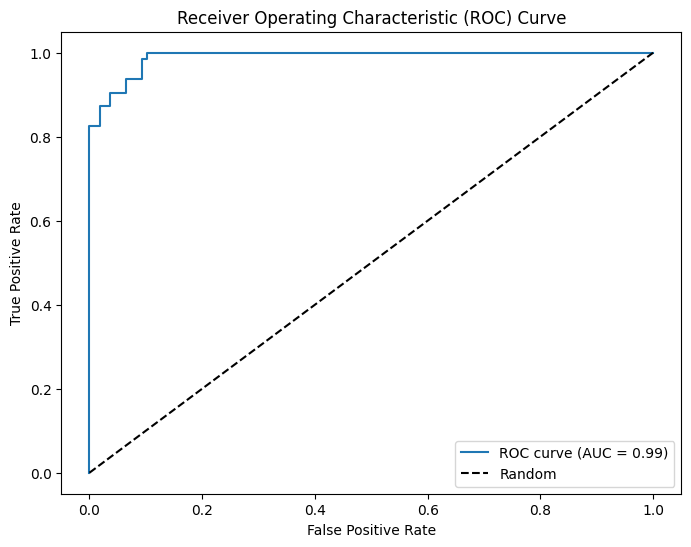

In [45]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [48]:
cm=confusion_matrix(y_test,prediction)

In [49]:
matrix_display= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)

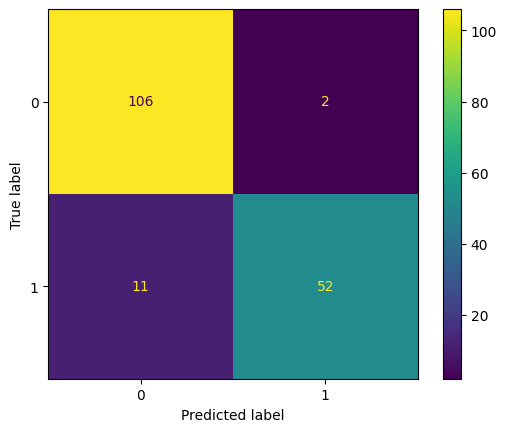

In [50]:
matrix_display.plot()
plt.show()

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [52]:
accuracy=accuracy_score(y_test,prediction)
precision=precision_score(y_test,prediction)
recall=recall_score(y_test,prediction)
f1=f1_score(y_test,prediction)

In [53]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.92
Precision: 0.96
Recall: 0.83
F1 Score: 0.89
